#**Brain Tumor Detection with AI**
Our advanced brain tumor detection model uses deep learning techniques to accurately differentiate tumor and normal brain images. Trained on a diverse dataset, the model employs a state-of-the-art convolutional neural network (CNN) to extract tumor-specific features. With optimized parameters and advanced techniques, it achieves high accuracy rates, aiding in timely medical intervention. The model provides visual heatmaps for diagnostic assessments and has the potential to revolutionize early detection and treatment. Ongoing improvements and collaborations aim to enhance accessibility and reduce the global burden of brain tumors. Our model represents a significant stride in AI healthcare, shaping advanced diagnostics and personalized treatments.

**Data Preprocessing:
<br>
Enhancing the Quality of Brain Images for Tumor Detection**
<br>
First Time We Adding OS and TensorFlow Libraries to the Project: Setting up the Environment

In [1]:
import os
import tensorflow as tf

Connecting Google Drive Account to the Project: Accessing Data for Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Extact all Contents of the Data Zip File: Extracting Data for Preprocessing<br>
Dataset Link: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

In [3]:
import zipfile
first_data_dir_name = "/content/gdrive/MyDrive/Brain MRI Images for Brain Tumor Detection.zip"
extract_dir_name = "/content/gdrive/MyDrive/Dataset"
zip_ref = zipfile.ZipFile(first_data_dir_name, 'r')
zip_ref.extractall(extract_dir_name)

zip_ref.close()

Specifying the Directory of the Current Dataset: Exploring the Contents

In [4]:
dataset_dir="/content/gdrive/MyDrive/Dataset"
print(os.listdir(dataset_dir))

['brain_tumor_dataset', 'no', 'yes']


As observed, it contains the directories 'brain_tumor_dataset', 'yes', and 'no'.

Specifying the Path of the Training Dataset: Exploring the Contents

In [5]:
train_dir=os.path.join(dataset_dir,"brain_tumor_dataset")
print(os.listdir(train_dir))

['no', 'yes']


As observed, there are two data folders named 'yes' and 'no'. The 'yes' folder contains brain images with tumors, while the 'no' folder contains brain images without tumors. Next, we are checking the number of files in each folder.

In [6]:
yes_tumor_dir=os.path.join(train_dir,"yes")
no_tumor_dir=os.path.join(train_dir,"no")

print("Yes tumor dirs length: ",len(yes_tumor_dir))
print("No tumor dirs length: ",len(no_tumor_dir))

Yes tumor dirs length:  55
No tumor dirs length:  54


**Our dataset is extremely limited in size!!!!!!**

That's why the next step is to incorporate another dataset into our project and merge the data.<br>
Dataset Link: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

In [7]:
import zipfile

second_data_dir_name = "/content/gdrive/MyDrive/Br35H  Brain Tumor Detection 2020.zip"
extract_dir_name = "/content/gdrive/MyDrive/Dataset"
zip_ref = zipfile.ZipFile(second_data_dir_name, 'r')
zip_ref.extractall(extract_dir_name)

zip_ref.close()

Applying the Same Procedures and Checking the Directory of our Dataset

In [8]:
print(os.listdir(dataset_dir))

['brain_tumor_dataset', 'no', 'yes', 'Br35H-Mask-RCNN', 'pred']


As observed, it contains the directories 'brain_tumor_dataset', 'yes', 'no' and addition 'Br35H-Mask-RCNN', 'pred'.

In [9]:
print(os.listdir(os.path.join(dataset_dir,"Br35H-Mask-RCNN")))

['TEST', 'TRAIN', 'VAL', 'annotations_all.json']


Analyzing the Length of our Dataset: In Here More Data is Available :)

In [10]:
second_file_no_tumor_dir=os.path.join(dataset_dir,"no")
second_file_yes_tumor_dir=os.path.join(dataset_dir,"yes")
second_file_test_tumor_dir=os.path.join(dataset_dir,"yes")

print("Length of No dir: ",len(os.listdir(second_file_no_tumor_dir)))
print("Length of Yes dir: ",len(os.listdir(second_file_yes_tumor_dir)))

Length of No dir:  1591
Length of Yes dir:  1655


Merging the Datasets: Combining the Data

In [11]:
import shutil

for i in os.listdir(second_file_no_tumor_dir):
  shutil.copyfile(os.path.join(second_file_no_tumor_dir,i),os.path.join(no_tumor_dir,f"photo-{i}"))

for j in os.listdir(second_file_yes_tumor_dir):
  shutil.copyfile(os.path.join(second_file_yes_tumor_dir,j),os.path.join(yes_tumor_dir,f"photo-{j}"))

In [12]:
print("Yes tumor dirs length: ",len(yes_tumor_dir))
print("No tumor dirs length: ",len(no_tumor_dir))


Yes tumor dirs length:  55
No tumor dirs length:  54


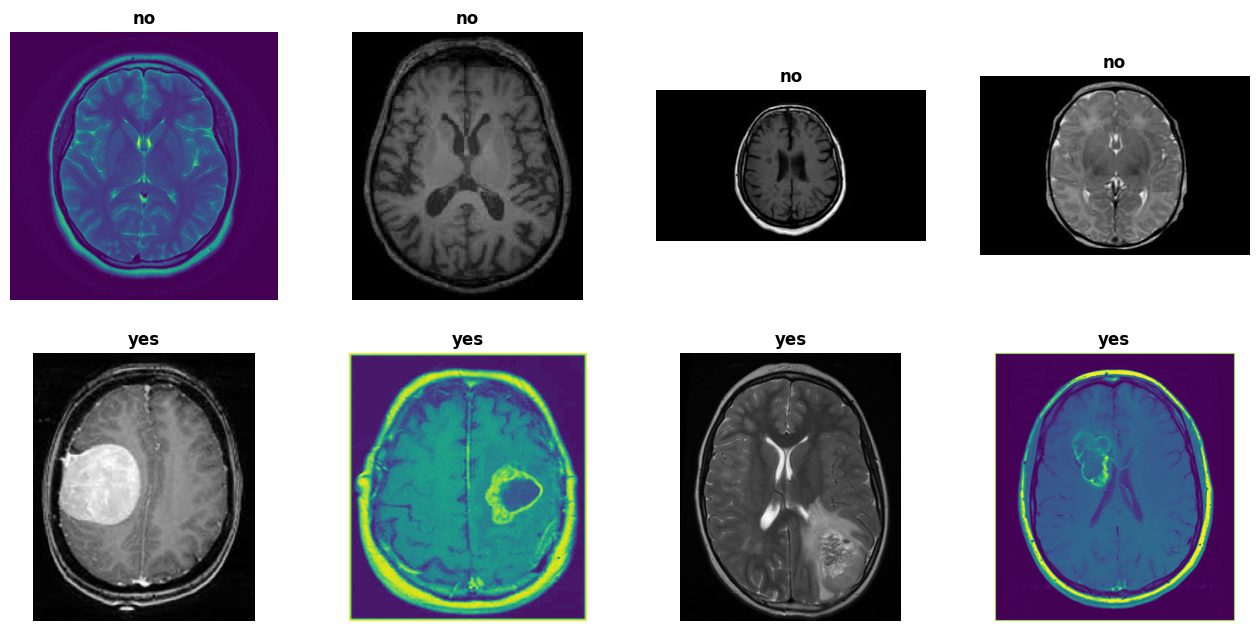

In [13]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

colums = 4
rows = 4
figure = plt.gcf()
figure.set_size_inches(colums*4, rows*4)

no_dir=[plt.imread(os.path.join(no_tumor_dir,x)) for x in os.listdir(no_tumor_dir)[:4]]
yes_dir=[plt.imread(os.path.join(yes_tumor_dir,x)) for x in os.listdir(yes_tumor_dir)[:4]]

titles = ['no', 'yes']
title_index=0

for i,j in enumerate(no_dir+yes_dir):
  sp = plt.subplot(rows, colums, i + 1)
  sp.axis('Off')
  plt.imshow(j)
  plt.title(titles[title_index], fontsize=12, fontweight='bold')
  if (i+1) % colums==0:
    title_index+=1
plt.show()

**Creating Our Model: Building the Architecture**<br>

Our model architecture incorporates an effective arrangement of layers. The initial design comprises three Convolutional layers, each consisting of 128 filters with a size of 3x3 and an activation function set to ReLU. The input shape of the first layer is (300, 300, 3), indicating that our model expects input images with dimensions of 300x300 pixels. Following these layers is a fourth layer, which is a MaxPooling layer of size 2x2. Subsequently, we introduce another sequence of three Convolutional layers, mirroring the previous configuration of 128 filters with a size of 3x3 and an activation function set to ReLU. Finally, we conclude the architecture with a MaxPooling layer of size 2x2. This arrangement aims to capture and extract relevant features from the input data, enabling effective learning and decision-making within the model.

In [14]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(300,300, 3)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

The final three layers of our model consist of fully connected layers. The first hidden layer, as shown in the architecture diagram, comprises 512 neurons. This layer serves as a powerful feature extractor, learning intricate patterns and representations from the input data. The subsequent layer is the output layer, which consists of a single neuron. Since we are dealing with a binary classification problem (tumor or non-tumor), the activation function used in the output layer is **sigmoid**. This activation function ensures that the output falls within the range of 0 and 1, allowing for a probabilistic interpretation of the classification decision. A value closer to 0 indicates a prediction of a non-tumor sample, while a value closer to 1 suggests the presence of a tumor.
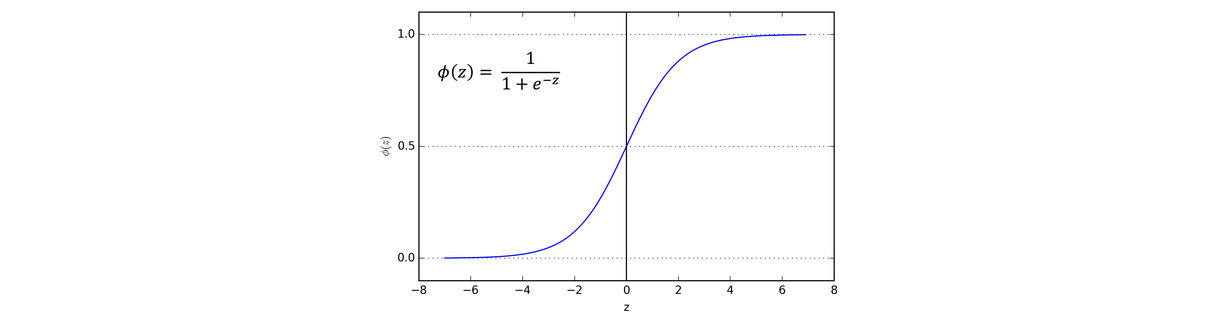

This snippet lets you visualize the convolutional layers for two images. Creates an activation_model to output the selected convolutional layer. The photo function is used to load and resize images accordingly. The resulting activation maps of the filter are then displayed using matplotlib.
As you can see, the convolutional layer has sharpened the tumor and made it more noticeable, and it looks prominent. Creates an activation_model to output the selected convolutional layer. The photo function is used to load and resize images accordingly. The resulting activation maps of the filter are then displayed using matplotlib.

1/1 [==============================] - 0s 22ms/step


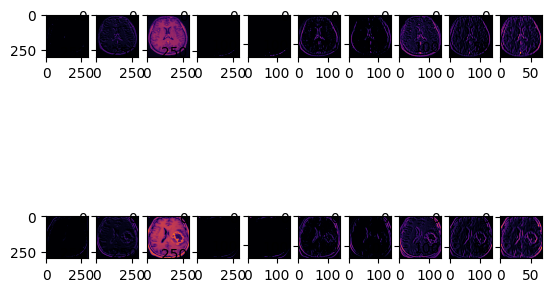

In [29]:
import cv2
import numpy as np

def foto(index,dir):
  target_size = (300,300)
  file_names = os.listdir(dir)
  first_image_path = os.path.join(dir, file_names[index])
  image = cv2.imread(first_image_path)
  resized_image = cv2.resize(image, target_size)
  return resized_image

import matplotlib.pyplot as plt

f, axarr = plt.subplots(2,10)

FIRST_IMAGE=56
SECOND_IMAGE=26
CONVOLUTION_NUMBER = 104

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,10):
  f1 = activation_model.predict(foto(FIRST_IMAGE,no_tumor_dir).reshape(1,300,300,3))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER],cmap="inferno")
  axarr[0,x].grid(False)

  f2 = activation_model.predict(foto(SECOND_IMAGE,yes_tumor_dir).reshape(1,300,300,3))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER],cmap="inferno")
  axarr[1,x].grid(False)

By adjusting the value of **CONVOLUTION_NUMBER**, you can explore and visualize activation maps of different filters within the model.

In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

The model.compile() function is essential for configuring the training process of your model. In the provided code snippet, the following configurations have been specified:

Optimizer: Adam with a learning rate of 0.0001
Loss function: Binary cross-entropy
Metrics: Accuracy
By setting the optimizer to Adam, the model will utilize the Adam optimization algorithm for updating the weights during training. The learning rate of 0.0001 determines the step size of weight updates.

The binary cross-entropy loss function is suitable for binary classification tasks. It quantifies the dissimilarity between predicted and actual class probabilities.

The accuracy metric is used to evaluate the performance of the model during training. It calculates the percentage of correct predictions compared to the true labels.

With these configurations, your model is ready to undergo training using Adam as the optimizer, binary cross-entropy as the loss function, and accuracy as the evaluation metric.

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_get=ImageDataGenerator(
      rescale=1./255,
      validation_split=0.2
)

train_generator=train_data_get.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode="binary",
    target_size=(300,300),
    subset='training'
    )

validation_generator=train_data_get.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode="binary",
    target_size=(300,300),
    subset='validation'
    )

Found 2800 images belonging to 2 classes.
Found 699 images belonging to 2 classes.


This code snippet imports the **ImageDataGenerator** class from the **TensorFlow Keras** library. It is used for loading data and performing data augmentation. We use **flow_from_directory()** to generate augmented training data with specified settings. The code creates an **ImageDataGenerator** object for the training data. The object rescales the image pixels to the [0,1] range using the '**rescale**' parameter. It also splits the data into a validation subset with a 20% split using the '**validation_split**' parameter. The images in the dataset are resized to the target size of 300x300, and the '**class_mode**' parameter is set to '**binary**' for binary classification. The code also creates a separate **ImageDataGenerator** object for the validation data using the same parameters. In the end, the code obtains generator objects for the training and validation subsets using the created **ImageDataGenerator** objects."

LET'S TRAIN THE MODEL.

In [18]:
modelling=model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    verbose=1
    )

Epoch 1/5
140/140 [==============================] - 246s 1s/step - loss: 0.4481 - accuracy: 0.7893 - val_loss: 0.2571 - val_accuracy: 0.9041
Epoch 2/5
140/140 [==============================] - 193s 1s/step - loss: 0.1614 - accuracy: 0.9439 - val_loss: 0.0829 - val_accuracy: 0.9814
Epoch 3/5
140/140 [==============================] - 193s 1s/step - loss: 0.0558 - accuracy: 0.9839 - val_loss: 0.0435 - val_accuracy: 0.9900
Epoch 4/5
140/140 [==============================] - 193s 1s/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0330 - val_accuracy: 0.9943
Epoch 5/5
140/140 [==============================] - 192s 1s/step - loss: 0.0075 - accuracy: 0.9964 - val_loss: 0.0488 - val_accuracy: 0.9914


*   The training loss started at 0.4481 and decreased to 0.0075.<br>
*   The training accuracy started at 0.7893 and increased to 0.9964.<br>
*   The validation loss started at 0.2571 and decreased to 0.0488.<br>
*   The validation accuracy started at 0.9041 and increased to 0.9914.<br>

Throughout the training process, the model's loss consistently decreased, while its accuracy steadily increased for both the training and validation datasets. These improvements indicate that the model successfully learned to classify brain tumor images. Moreover, the validation metrics demonstrate that the model generalizes well to unseen data.

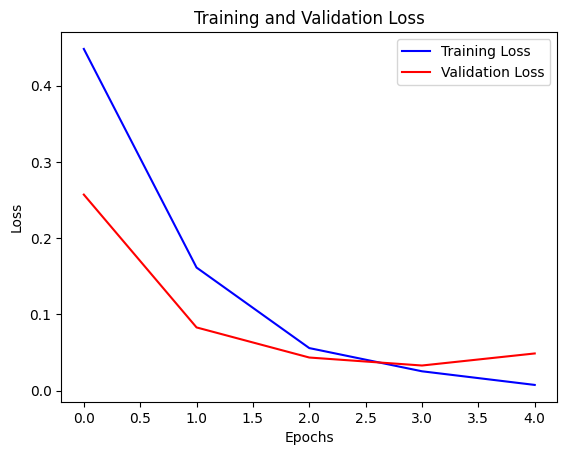

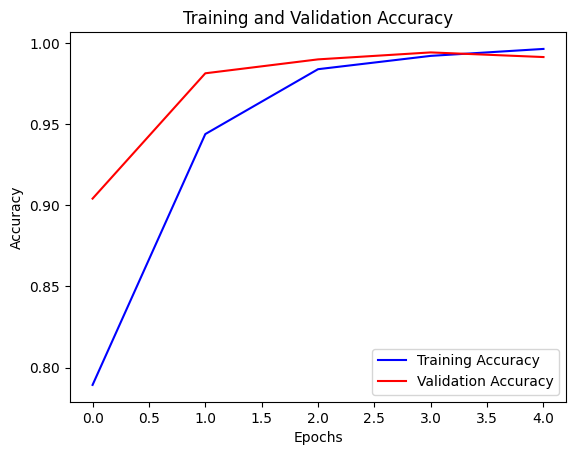

In [22]:
import matplotlib.pyplot as plt

train_loss = modelling.history['loss']
val_loss = modelling.history['val_loss']

train_acc = modelling.history['accuracy']
val_acc = modelling.history['val_accuracy']

plt.plot(train_loss, 'b', label='Training Loss')
plt.plot(val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_acc, 'b', label='Training Accuracy')
plt.plot(val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

These results show that the model improves its fit to the training data as the training loss consistently decreases. However, there is a slight increase in the validation loss, suggesting a potential risk of overfitting and poorer performance on unseen data.

Nevertheless, both the training and validation accuracies increase over the epochs, indicating that the model's performance improves as it learns from the training data and makes more accurate predictions.

Overall, the model demonstrates learning and improvement, but caution should be taken due to the slight risk of overfitting indicated by the validation loss trend. To mitigate this, regularization techniques or further optimization can be explored to enhance generalization to unseen data. As a result, the model has been successfully learned.

In [21]:
model.save('my_model.h5')

In [30]:
import numpy as np
import cv2
from google.colab import files

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn

  image = cv2.imread(path)
  resized_image = cv2.resize(image, (300, 300))

  x=np.expand_dims(resized_image/255, axis=0)
  images = np.vstack([x])

  prediction = model.predict(images)

  print(prediction[0])
  if prediction[0][0]>0.5:
    print("Tumor Brain")
  elif prediction[0][0]<0.5:
    print("Normal Brain")



Saving normal.jpg to normal.jpg
Saving tumor1.jpg to tumor1.jpg
Saving tumor2.jpg to tumor2.jpg
Saving tumor3.jpg to tumor3.jpg
Saving tumor4.jpg to tumor4.jpg
1/1 [==============================] - 0s 156ms/step
[6.199344e-08]
Normal Brain
1/1 [==============================] - 0s 24ms/step
[0.9994062]
Tumor Brain
1/1 [==============================] - 0s 25ms/step
[0.999943]
Tumor Brain
1/1 [==============================] - 0s 23ms/step
[0.9999999]
Tumor Brain
1/1 [==============================] - 0s 26ms/step
[0.9999695]
Tumor Brain


The predictions for the uploaded images are as follows:<br>

normal.jpg: The model predicts a very low probability of tumor presence, indicating a normal brain.<br>
tumor1.jpg: The model predicts a high probability of tumor presence, indicating a tumor in the brain.<br>
tumor2.jpg: The model predicts a high probability of tumor presence, indicating a tumor in the brain.<br>
tumor3.jpg: The model predicts a high probability of tumor presence, indicating a tumor in the brain.<br>
tumor4.jpg: The model predicts a very high probability of tumor presence, indicating a tumor in the brain.<br>

Based on these predictions, the model classifies the images as either "Normal Brain" or "Tumor Brain" with varying levels of confidence.<br>

**The model shows impressive performance, accurately detecting brain tumors with high confidence.**


